In [81]:
import numpy as np
from source.coordinate_descent import CoordinateDescent

from source.utils.load_data import get_high_dimensional_artificial_ds
from sklearn.datasets import load_diabetes, load_boston

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

# Artificially generated high-dimensional dataset
## Loading Data

In [82]:
X, y = load_diabetes(return_X_y=True)
#X, y = load_boston(return_X_y=True)

# normalization
X = X / (np.linalg.norm(X, axis=0))

In [83]:
X.shape

(442, 10)

## Lasso Regression with our implementation of Coordinate Descent algorithm

In [117]:
l = 2
cd = CoordinateDescent(lambda_=l)
cd.fit(X, y, iters=100, tol=10^-6, method='greedy')

100%|██████████| 100/100 [00:02<00:00, 37.85it/s]


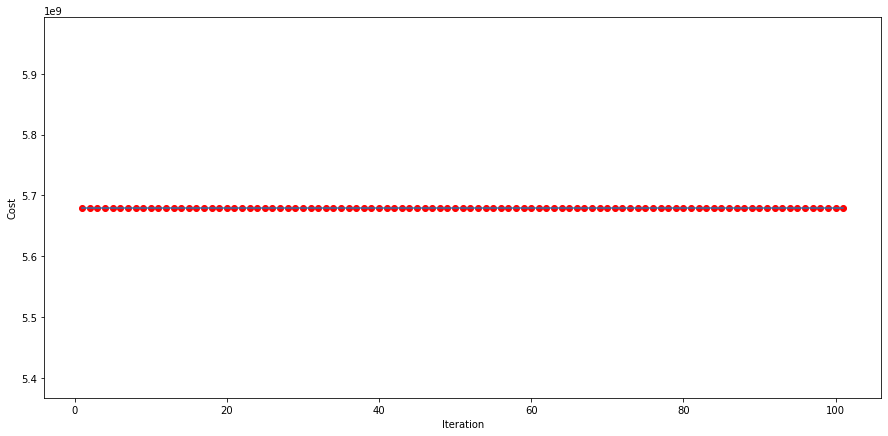

In [118]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, cd.costs.shape[0]+1), cd.costs, 'o', color = 'red')
plt.plot(range(1, cd.costs.shape[0]+1), cd.costs, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [116]:
cd.costs

array([5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
       5.68010708e+09, 5.68010708e+09, 5.68010708e+09, 5.68010708e+09,
      